### 1. Import jeopardy.csv and create a dataframe from the data. Find out the following:

In [4]:
import pandas as pd
jeopardy = pd.read_csv("JEOPARDY_CSV.csv")
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


#### a. How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?

In [5]:
len(jeopardy)

216930

#### b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

#### c. How many unique shows were there each year?

In [6]:
jeopardy_years = pd.DatetimeIndex(jeopardy[" Air Date"]).year
shows_per_year = jeopardy.groupby(jeopardy_years)["Show Number"].nunique()
shows_per_year

 Air Date
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Show Number, dtype: int64

#### d. How many times was each category used?

In [7]:
category_grouped = jeopardy.groupby(" Category")
category_unique = category_grouped[' Category'].count()
category_unique_sorted = category_unique.sort_values(ascending=False)
category_unique_sorted

 Category
BEFORE & AFTER            547
SCIENCE                   519
LITERATURE                496
AMERICAN HISTORY          418
POTPOURRI                 401
                         ... 
FOREIGN-BORN INVENTORS      1
WORD HISTORIES              1
FOREIGN WARS                1
HISTORIC NAMESAKES          1
U.S. GEOLOGY                1
Name:  Category, Length: 27983, dtype: int64

#### e. Which month (over the years) has had the most shows?

In [8]:
jeopardy_months = pd.DatetimeIndex(jeopardy[" Air Date"]).month
shows_per_month = jeopardy.groupby(jeopardy_months)["Show Number"].count()
shows_per_month_sorted = shows_per_month.sort_values(ascending=False)
top_month = shows_per_month_sorted.head(1)
top_month
#November had the most shows per month

 Air Date
11    25672
Name: Show Number, dtype: int64

#### f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.

In [9]:
answer_grouped = jeopardy.groupby(" Answer")
answer_unique = answer_grouped[' Answer'].count()
answer_unique_sorted = answer_unique.sort_values(ascending=False)
top3_answers = answer_unique_sorted.head(3)
top3_answers

 Answer
China        216
Australia    215
Japan        196
Name:  Answer, dtype: int64

In [10]:
answer_index = jeopardy.set_index(' Answer')
answer_index.loc[["China", "Australia", "Japan"]]

,Show Number,Air Date,Round,Category,Value,Question
Answer,,,,,,
China,4107,6/11/2002,Jeopardy!,REMEMBER THE TIME,$200,In 1958 this country launched its second 5-yea...
China,5392,2/5/2008,Jeopardy!,WHAT A WEEK,$800,"In 1999 this country began 3 ""golden weeks"" of..."
China,4487,2/24/2004,Jeopardy!,FOOD CHAIN,$400,P.F. Chang's is an upscale bistro specializing...
China,4751,4/11/2005,Jeopardy!,GOVERNMENT,$600,This country's National People's Congress has ...
China,5935,6/4/2010,Jeopardy!,IT BORDERS INDIA,$200,"Of the 6 nations India borders, this one is th..."
...,...,...,...,...,...,...
Japan,3888,6/27/2001,Double Jeopardy!,RUSSIAN HISTORY,"$1,000","On Feb. 8, 1904 this country attacked Port Art..."
Japan,5619,1/29/2009,Double Jeopardy!,RAISE THE FLAG,"$1,200","This nation's maritime self-defense force, suc..."
Japan,4216,12/23/2002,Jeopardy!,U.S. HISTORY,"$1,000","On July 8, 1853 Matthew Perry presented a lett..."


#### 2. Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately.

In [11]:
top5_categories = category_unique_sorted.head(5)
top5_categories

 Category
BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
POTPOURRI           401
Name:  Category, dtype: int64

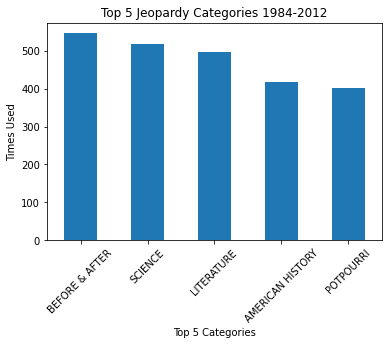

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

top5_categories.plot.bar(rot=45, xlabel="Top 5 Categories", ylabel="Times Used", 
                     title="Top 5 Jeopardy Categories 1984-2012")
plt.show()